# ECMB dike orientations

The orientation of the ECMB dikes were measured in the field. The data analysis approach is to take the measurements made for each dike and take a Fisher mean of the poles of those planes to determine the mean dike orientation.

## Import scientific python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pmagpy.pmagplotlib as pmagplotlib

## Import data

In [2]:
dike_planes = pd.read_csv('../Data/dike_orientations/ECMB_plane_combined.csv')

## Calculate pole trend and plunge

In [3]:
for n in range(0,len(dike_planes)):
    if dike_planes[' strike'][n]<180:
        dike_planes['pole_plunge'][n]=90-dike_planes[' dip'][n]
        dike_planes['pole_trend'][n] = dike_planes[' strike'][n]-90
    if dike_planes[' strike'][n]>180:
        dike_planes['pole_plunge'][n]=dike_planes[' dip'][n]-90
        dike_planes['pole_trend'][n] = dike_planes[' strike'][n]+90
dike_planes.head(1)

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
0,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,15b9bb974d2023bfdf461b59373f0482,403853.8778,5043052.149,45.534368,-94.231393,15T,4.0,...,83.595642,225.386734,135.386734,0.104983,Diabase Dike,Fri Jul 27 10:21:01 2018,NWD1,NWD1,45.386734,6.404358


## Define functions to plot and find the average orientation of each dike

In [4]:
def plotC(fignum, pole, ang, col='k', ms=10, plot_up = False):
    """
    function to put a small circle on an equal area projection plot, fig,fignum
    """
    plt.figure(num=fignum)
    D_c, I_c = pmag.circ(pole[0], pole[1], ang)
    X_c_up, Y_c_up = [], []
    X_c_d, Y_c_d = [], []
    for k in range(len(D_c)):
        XY = pmag.dimap(D_c[k], I_c[k])
        if I_c[k] < 0:
            X_c_up.append(XY[0])
            Y_c_up.append(XY[1])
        else:
            X_c_d.append(XY[0])
            Y_c_d.append(XY[1])
    plt.scatter(X_c_d, Y_c_d, c=col, marker='.', s=ms)
    if plot_up == True:
        plt.plot(X_c_up, Y_c_up, 'c.', ms)


def mean_strike_dip(pole_trends, pole_plunges, show_fig=True):
   
    '''
    This function uses pole trend and plunge measurments to calculate the average stike and dip of a dike
    
    Arguments
    ----------
    pole_trends
    pole_plunges
    
    Output
    ----------
    mean_dip : average dip of a dike
    mean_strike : average strike of a dike
    '''
    
    pole_mean = ipmag.fisher_mean(pole_trends,pole_plunges)
    ipmag.print_direction_mean(pole_mean)
    
    if pole_mean['inc'] > 0:
        mean_strike = (pole_mean['dec']+90)%360
        mean_dip = 90-pole_mean['inc']
        
    if pole_mean['inc'] <= 0:
        mean_strike = (pole_mean['dec']-90)%360
        mean_dip = 90+pole_mean['inc']
        
    print('\nmean strike: ' + str(mean_strike))
    print('mean dip: ' + str(mean_dip))
    
    if show_fig == True:
        fignum = 1
        fig = plt.figure(num=fignum,figsize=(6,6))
        ipmag.plot_net(fignum)
        ipmag.plot_di(pole_trends,pole_plunges,color='grey')
        for n in range(0,len(pole_trends)):
            plotC(fignum,(pole_trends[n],pole_plunges[n]),90,col='grey',ms=2)

        ipmag.plot_di_mean(pole_mean['dec'],pole_mean['inc'],pole_mean['alpha95'],color='red')
        plotC(fignum,(pole_mean['dec'],pole_mean['inc']),90,col='red',ms=10)
        plt.show()

    return mean_strike, mean_dip, pole_mean

## Plot all measurements

Dec: 340.8  Inc: 4.0
Number of directions in mean (n): 216
Angular radius of 95% confidence (a_95): 2.7
Precision parameter (k) estimate: 13.3

mean strike: 70.80037307889188
mean dip: 85.96615740120927


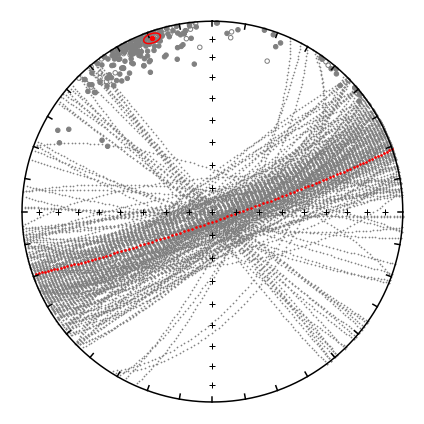

In [5]:
ECMB_pole_trends = dike_planes['pole_trend'].tolist()
ECMB_pole_plunges = dike_planes['pole_plunge'].tolist()

ECMB_mean_strike, ECMB_mean_dip, ECMB_pole_mean = mean_strike_dip(ECMB_pole_trends, ECMB_pole_plunges)

## Split the data by dike

In [6]:
NED1_planes = dike_planes[dike_planes['dike ID']=='NED1']
NED2_planes = dike_planes[dike_planes['dike ID']=='NED2']
NED3_planes = dike_planes[dike_planes['dike ID']=='NED3']
NED4_planes = dike_planes[dike_planes['dike ID']=='NED4']
NED5_planes = dike_planes[dike_planes['dike ID']=='NED5']
NED6_planes = dike_planes[dike_planes['dike ID']=='NED6']
NED7_planes = dike_planes[dike_planes['dike ID']=='NED7']
NED8_planes = dike_planes[dike_planes['dike ID']=='NED8']
NED9_planes = dike_planes[dike_planes['dike ID']=='NED9']
NED10_planes = dike_planes[dike_planes['dike ID']=='NED10']
NED11_planes = dike_planes[dike_planes['dike ID']=='NED11']
NED12_planes = dike_planes[dike_planes['dike ID']=='NED12']
NED13_planes = dike_planes[dike_planes['dike ID']=='NED13']
NED14_planes = dike_planes[dike_planes['dike ID']=='NED14']
NED15_planes = dike_planes[dike_planes['dike ID']=='NED15']
NED16_planes = dike_planes[dike_planes['dike ID']=='NED16']
NED17_planes = dike_planes[dike_planes['dike ID']=='NED17']
NED18_planes = dike_planes[dike_planes['dike ID']=='NED18']
NED19_planes = dike_planes[dike_planes['dike ID']=='NED19']
NED22_planes = dike_planes[dike_planes['dike ID']=='NED22']
NED23_planes = dike_planes[dike_planes['dike ID']=='NED23']
NED24_planes = dike_planes[dike_planes['dike ID']=='NED24']
NED32_planes = dike_planes[dike_planes['dike ID']=='NED32']
NED34_planes = dike_planes[dike_planes['dike ID']=='NED34']
NED35_planes = dike_planes[dike_planes['dike ID']=='NED35']
NED36_planes = dike_planes[dike_planes['dike ID']=='NED36']
NED37_planes = dike_planes[dike_planes['dike ID']=='NED37']
NWD1_planes = dike_planes[dike_planes['dike ID']=='NWD1']

## NED1

Coordinates: 45.534216, -94.241953

Description: A diabase dike that is 1.8 meters in width that is intruding St. Cloud Granite. It forms the southern wall of quarry 18 of Stearns County Quarry Park.

In [7]:
NED1_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
81,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,55ed8f92c15cde1fb7222b7e74740bb5,403030.1738,5043049.187,45.534228,-94.241940,15T,3.0,...,83.716011,169.773727,79.773727,0.104983,Diabase Dike,Mon Jul 23 14:42:55 2018,NED1 southside,NED1,-10.226273,6.283989
82,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,30ce6787f35cc5bbb0b12fe0ff85ab00,403035.4803,5043048.611,45.534223,-94.241871,15T,0.0,...,77.269821,169.314316,79.314316,0.104983,Diabase Dike,Mon Jul 23 14:25:24 2018,NED1 northside,NED1,-10.685684,12.730179
83,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,7e595e6413dd10ef3e922dd54be222d3,403033.8585,5043044.910,45.534190,-94.241892,15T,4.0,...,83.969826,166.160721,76.160721,0.104983,Diabase Dike,Mon Jul 23 14:15:59 2018,NED1 southside,NED1,-13.839279,6.030174
84,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8ddaf1bfa32a6a7362f6a5681e087bd5,403035.8860,5043045.219,45.534193,-94.241866,15T,4.0,...,81.966789,153.323379,63.323380,0.104983,Diabase Dike,Mon Jul 23 14:15:36 2018,NED1 southside,NED1,-26.676620,8.033211


Dec: 344.6  Inc: 8.3
Number of directions in mean (n): 4
Angular radius of 95% confidence (a_95): 9.4
Precision parameter (k) estimate: 96.9

mean strike: 74.6475589982237
mean dip: 81.67579066194945


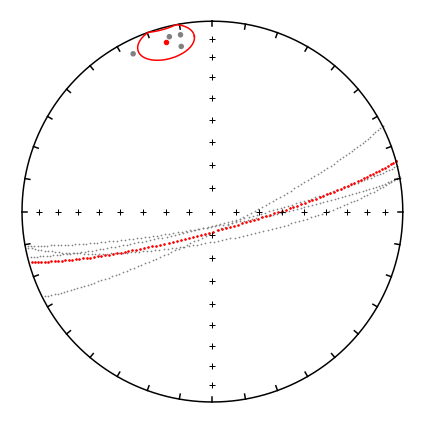

In [8]:
NED1_strikes = NED1_planes[' strike'].tolist()
NED1_dips = NED1_planes[' dip'].tolist()

NED1_pole_trends = NED1_planes['pole_trend'].tolist()
NED1_pole_plunges = NED1_planes['pole_plunge'].tolist()

NED1_mean_strike, NED1_mean_dip, NED1_pole_mean = mean_strike_dip(NED1_pole_trends, NED1_pole_plunges)

## NED2

Coordinates: 45.534181, -94.241911

Description: A diabase dike that is 1.9 meters in width that is indruding St. Cloud Granite. Some fracture planes with red oxidation and green alteration minerals are present. It is located in Stearns County Quarry Park, and is south of NED1 by 3.1 meters.

In [9]:
NED2_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
73,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,1501d10ebb2951e703c447f3c75396b2,403030.9918,5043042.402,45.534167,-94.241928,15T,4.000000,...,89.000000,181.502640,91.502640,0.104983,Diabase Dike,Mon Jul 23 16:17:28 2018,NED2 northside,NED2,1.502640,1.000000
74,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,29c09941f8821ce4be14330978bb4888,403028.9580,5043039.574,45.534141,-94.241953,15T,4.000000,...,88.219170,336.253479,246.253479,0.104983,Diabase Dike,Mon Jul 23 16:16:57 2018,NED2 southside,NED2,336.253479,-1.780830
75,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,6b0276aa074a5dab9d8b567daba8eeeb,403020.5738,5043042.196,45.534163,-94.242061,15T,4.000000,...,85.926910,154.496613,64.496613,0.104983,Diabase Dike,Mon Jul 23 16:16:01 2018,NED2 southside,NED2,-25.503387,4.073090
76,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,eaaa2bc6bae213f14a6dc8c01c7e1e46,403026.5170,5043043.003,45.534171,-94.241985,15T,4.000000,...,86.681915,343.222412,253.222412,0.104983,Diabase Dike,Mon Jul 23 16:09:50 2018,NED2 southside,NED2,343.222412,-3.318085
77,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,93f78b6cc3178a3db0297dd6cde84a77,403027.7318,5043043.245,45.534174,-94.241970,15T,4.000000,...,89.000000,342.308594,252.308594,0.104983,Diabase Dike,Mon Jul 23 16:09:29 2018,NED2 southside,NED2,342.308594,-1.000000
78,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,1ced7c4e84fdee81ff707f64c58e6c79,403040.4974,5043039.908,45.534145,-94.241806,15T,4.000000,...,80.997368,351.442535,261.442535,0.104983,Diabase Dike,Mon Jul 23 16:09:05 2018,NED2 northside,NED2,351.442535,-9.002632
79,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,04a495f7a11143ad04ceb5bd74696caa,403038.1539,5043047.526,45.534214,-94.241837,15T,4.000000,...,89.000000,354.898529,264.898529,0.104983,Diabase Dike,Mon Jul 23 15:55:16 2018,NED2 northside,NED2,354.898529,-1.000000
80,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,c4d204337dfe24ba96f4014fd236d8ee,403039.4678,5043049.518,45.534232,-94.241821,15T,4.000000,...,89.000000,181.260620,91.260620,0.104983,Diabase Dike,Mon Jul 23 15:54:57 2018,NED2 northside,NED2,1.260620,1.000000
134,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,cec638393896a1887a67a8f7bab01b0a,403033.3583,5043045.160,45.534192,-94.241898,15T,337.554020,...,88.000000,334.000000,244.000000,0.910000,Diabase dike,Mon Jul 23 11:55:00 2018,,NED2,334.000000,-2.000000
135,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,c5a39a0ea35a927adeec849c341cec3b,403030.7342,5043043.524,45.534177,-94.241931,15T,336.660221,...,79.000000,143.000000,53.000000,0.910000,Diabase dike,Mon Jul 23 11:53:32 2018,,NED2,-37.000000,11.000000


Dec: 344.3  Inc: -0.1
Number of directions in mean (n): 10
Angular radius of 95% confidence (a_95): 8.3
Precision parameter (k) estimate: 34.9

mean strike: 254.27379661623252
mean dip: 89.8912155942666


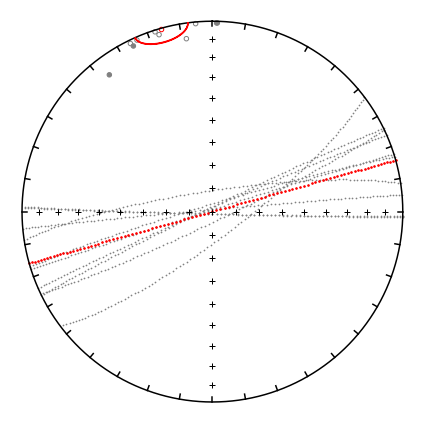

In [10]:
NED2_strikes = NED2_planes[' strike'].tolist()
NED2_dips = NED2_planes[' dip'].tolist()

NED2_pole_trend = NED2_planes['pole_trend'].tolist()
NED2_pole_plunge = NED2_planes['pole_plunge'].tolist()

NED2_mean_strike, NED2_mean_dip, NED2_pole_mean = mean_strike_dip(NED2_pole_trend, NED2_pole_plunge)

## NED3

Coordinates: 45.533923, -94.242396

Description: A diabase dike that is 1.1 meters in width that is indruding St. Cloud Granite. It forms the northern wall of quarry 16 of Stearns County Quarry Park.

In [11]:
NED3_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
69,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,ac527869dc610645f162612221ff8035,402998.1351,5043012.253,45.533891,-94.242342,15T,3.000000,...,78.142555,147.682648,57.682648,0.104983,Diabase Dike,Mon Jul 23 17:28:45 2018,NED3 southside,NED3,-32.317352,11.857445
70,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,35730ce23da564e3762834d31c30605c,402994.2307,5043009.524,45.533866,-94.242392,15T,3.000000,...,76.013351,146.044067,56.044067,0.104983,Diabase Dike,Mon Jul 23 17:28:22 2018,NED3 southside,NED3,-33.955933,13.986649
71,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,74fd0921f787204627d5bf83d170aa91,403000.5590,5043010.255,45.533873,-94.242311,15T,3.000000,...,77.483040,148.187759,58.187759,0.104983,Diabase Dike,Mon Jul 23 17:21:33 2018,NED2 south margin,NED3,-31.812241,12.516960
72,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,068db74d28ef642cf8f74a4714e1099a,402997.3692,5043013.522,45.533902,-94.242353,15T,3.000000,...,72.417748,145.236588,55.236588,0.104983,Diabase Dike,Mon Jul 23 17:20:08 2018,NED3 south margin,NED3,-34.763412,17.582252
86,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,39d1d9bb1c3df77cbad1e10ee8d73f40,402986.7179,5043015.582,45.533919,-94.242489,15T,3.000000,...,78.387886,141.775360,51.775360,0.104983,Diabase Dike,Mon Jul 23 11:36:42 2018,,NED3,-38.224640,11.612114
87,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,a0e2ee48dd85035647d2a635d0f3a09e,402997.3962,5043019.497,45.533956,-94.242353,15T,4.000000,...,74.164833,143.834976,53.834976,0.104983,Diabase Dike,Mon Jul 23 11:34:07 2018,,NED3,-36.165024,15.835167
88,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,a319f2f3eea4e1dac5708ff524821b18,403040.1420,5043030.474,45.534060,-94.241808,15T,3.000000,...,81.038383,136.493088,46.493088,0.104983,Diabase Dike,Mon Jul 23 11:25:13 2018,,NED3,-43.506912,8.961617
89,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,5ae616563e948f640d73e877b63c5de6,403035.7741,5043028.250,45.534040,-94.241864,15T,3.000000,...,77.096107,135.323273,45.323273,0.104983,Diabase Dike,Mon Jul 23 11:24:37 2018,,NED3,-44.676727,12.903893
90,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,d02b022b87ef27afc8a96e0b4e4b319d,403035.7741,5043028.250,45.534040,-94.241864,15T,3.000000,...,76.612305,135.471191,45.471191,0.104983,Diabase Dike,Mon Jul 23 11:24:30 2018,,NED3,-44.528809,13.387695
91,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,6307543e0ef64fcaa4df1fcc5f6af12d,403063.9422,5042949.118,45.533332,-94.241487,15T,3.000000,...,89.000000,338.605347,248.605347,0.104983,Diabase Dike,Mon Jul 23 11:16:46 2018,,NED3,338.605347,-1.000000


Dec: 328.7  Inc: 11.4
Number of directions in mean (n): 13
Angular radius of 95% confidence (a_95): 6.9
Precision parameter (k) estimate: 36.7

mean strike: 58.68882515217251
mean dip: 78.55162010835141


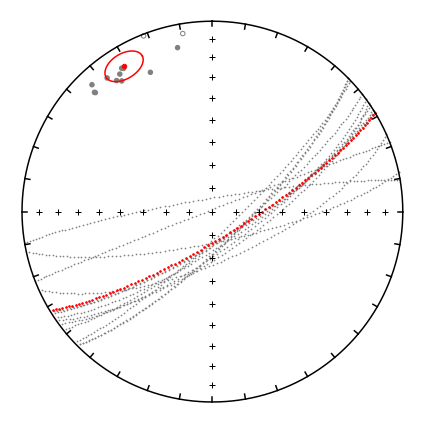

In [12]:
NED3_strikes = NED3_planes[' strike'].tolist()
NED3_dips = NED3_planes[' dip'].tolist()

NED3_pole_trend = NED3_planes['pole_trend'].tolist()
NED3_pole_plunge = NED3_planes['pole_plunge'].tolist()

NED3_mean_strike, NED3_mean_dip, NED3_pole_mean = mean_strike_dip(NED3_pole_trend, NED3_pole_plunge)

## NED4

Coordinates: 45.533418, -94.241377

Description: A diabase dike that is 0.85 to 0.9 meters in width that is indruding St. Cloud Granite. It likely thins in an eastwardly direction. Glacial striations are present on granite/dike exposure. The dike forms the north wall nearest the northeast corner of quarry 13 in Stearns County Quarry Park. 

In [13]:
NED4_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
62,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,99ad542b24dcf7c485a694ebcf7dd150,403067.6096,5042952.177,45.533360,-94.241441,15T,3.0,...,85.488625,335.239136,245.239136,0.104983,Diabase Dike,Tue Jul 24 08:57:01 2018,NED4,NED4,335.239136,-4.511375
63,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,b44877af52f1310978320630378d6cf8,403067.4970,5042953.790,45.533374,-94.241443,15T,3.0,...,82.932564,335.121460,245.121460,0.104983,Diabase Dike,Tue Jul 24 08:55:23 2018,NED4,NED4,335.121460,-7.067436
64,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,c5c0020e79f51721b4be3480e4d32de3,403061.1601,5042950.390,45.533343,-94.241523,15T,3.0,...,87.132553,153.397568,63.397568,0.104983,Diabase Dike,Tue Jul 24 08:54:56 2018,NED4,NED4,-26.602432,2.867447
65,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,2068533454a82093df88e898ddf8ee94,403061.5127,5042952.024,45.533358,-94.241519,15T,3.0,...,86.559242,158.942780,68.942780,0.104983,Diabase Dike,Tue Jul 24 08:54:31 2018,NED4,NED4,-21.057220,3.440758
66,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,806828a036123367ea19511b1101828f,403064.2614,5042955.367,45.533388,-94.241484,15T,3.0,...,86.048370,353.141449,263.141449,0.104983,Diabase Dike,Tue Jul 24 08:54:07 2018,NED4,NED4,353.141449,-3.951630
67,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,13691cbe224258f1edd19ef7c76f63a3,403060.1345,5042947.141,45.533313,-94.241536,15T,3.0,...,80.584900,162.072357,72.072357,0.104983,Diabase Dike,Tue Jul 24 08:25:30 2018,,NED4,-17.927643,9.415100
68,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,1558df38259684c8d5ced14241bce01f,403055.2738,5042944.380,45.533288,-94.241597,15T,3.0,...,85.867867,339.943878,249.943878,0.104983,Diabase Dike,Tue Jul 24 08:25:02 2018,,NED4,339.943878,-4.132133


Dec: 339.7  Inc: -0.6
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 6.7
Precision parameter (k) estimate: 82.9

mean strike: 249.67843977314823
mean dip: 89.42900829248583


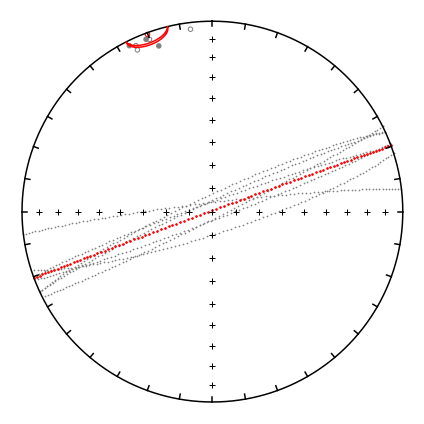

In [14]:
NED4_strikes = NED4_planes[' strike'].tolist()
NED4_dips = NED4_planes[' dip'].tolist()

NED4_pole_trend = NED4_planes['pole_trend'].tolist()
NED4_pole_plunge = NED4_planes['pole_plunge'].tolist()

NED4_mean_strike, NED4_mean_dip, NED4_pole_mean = mean_strike_dip(NED4_pole_trend, NED4_pole_plunge)

## NED5

Coordinates: 45.533108, -94.242115

Description: A diabase dike with a minimum thickness of 3.7 meters, likely up to 4.2 meters in width that is indruding St. Cloud Granite. The dike forms the northern wall of quarry 13 in Stearns County Quarry Park.

In [15]:
NED5_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
58,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,72922cc60446fee3b09bcb959747a297,403023.7537,5042923.641,45.533097,-94.241997,15T,3.000000,...,86.097389,164.101166,74.101166,0.104983,Diabase Dike,Tue Jul 24 10:15:44 2018,NED5,NED5,-15.898834,3.902611
59,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,074368ee294027fa8b1ae0d3823456fd,403003.4163,5042918.246,45.533045,-94.242256,15T,3.000000,...,83.026894,158.116104,68.116104,0.104983,Diabase Dike,Tue Jul 24 10:13:22 2018,NED5,NED5,-21.883896,6.973106
60,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,bedeef2c75f0965ce81ec8a3aba2e2c5,403067.6096,5042952.177,45.533360,-94.241441,15T,3.000000,...,84.433609,160.590912,70.590912,0.104983,Diabase Dike,Tue Jul 24 10:13:06 2018,NED5,NED5,-19.409088,5.566391
61,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,86a2d2289ddbc64a5b21be18e5a14804,403009.9843,5042915.424,45.533021,-94.242172,15T,3.000000,...,80.850266,173.020691,83.020691,0.104983,Diabase Dike,Tue Jul 24 10:11:12 2018,NED5,NED5,-6.979309,9.149734
131,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,b237a896144b93463f888399e7046c1b,403025.1590,5042921.807,45.533081,-94.241979,15T,339.574537,...,86.000000,143.000000,53.000000,0.910000,Diabase dike,Tue Jul 24 10:21:08 2018,,NED5,-37.000000,4.000000
132,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,e8e9e40fd06b5c8472666bbdae28514b,403024.2716,5042921.146,45.533074,-94.241990,15T,339.592211,...,86.000000,155.000000,65.000000,0.910000,Diabase dike,Tue Jul 24 10:20:45 2018,,NED5,-25.000000,4.000000
133,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,ff7327bfe2f6ff0e45480715305816ca,403042.5073,5042926.937,45.533129,-94.241757,15T,342.137516,...,86.000000,148.000000,58.000000,0.910000,Diabase dike,Mon Jul 23 12:14:49 2018,,NED5,-32.000000,4.000000


Dec: 337.4  Inc: 5.4
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 7.6
Precision parameter (k) estimate: 63.9

mean strike: 67.3773507400474
mean dip: 84.55980477057743


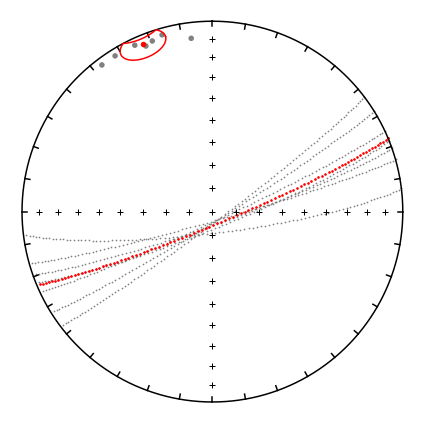

In [16]:
NED5_strikes = NED5_planes[' strike'].tolist()
NED5_dips = NED5_planes[' dip'].tolist()

NED5_pole_trend = NED5_planes['pole_trend'].tolist()
NED5_pole_plunge = NED5_planes['pole_plunge'].tolist()

NED5_mean_strike, NED5_mean_dip, NED5_pole_mean = mean_strike_dip(NED5_pole_trend, NED5_pole_plunge)

## NED6

Coordinates: 45.533048, -94.242278

Description: A diabase dike that is 0.65 meters in width that is indrtuding in St. Cloud Granite. It is located 1.8 meters south of NED5, along the southwest bank of quarry 13. No plane measurments were taken due to the dike's complete encasement in granite. 

Orientation: Trends of 060, 059, 064

## NED7

Coordinates: 45.532850, -94.242283

Description: A diabase dike that is 0.17 meters in width, and is exposed near the west wall of quarry 13. Samples were taken along the top of the wall with all cores near the north margin. The dike features variable orientations, and dips both north and south.

In [17]:
NED7_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
52,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,eff5511d899a20583e2c44e939c13cc6,403005.8944,5042900.715,45.532888,-94.242221,15T,3.000000,...,84.043671,341.198822,251.198822,0.104983,Diabase Dike,Tue Jul 24 14:03:42 2018,NED7,NED7,341.198822,-5.956329
53,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,c258ee759a031a7deeb7534d6732ed99,403005.4268,5042895.879,45.532844,-94.242226,15T,3.000000,...,74.000793,162.819351,72.819351,0.104983,Diabase Dike,Tue Jul 24 14:03:16 2018,NED7,NED7,-17.180649,15.999207
54,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,afcf9e1bcbdc09f9d6fa3ae4d587459e,403007.4516,5042894.739,45.532834,-94.242200,15T,3.000000,...,87.073303,156.518478,66.518478,0.104983,Diabase Dike,Tue Jul 24 14:02:53 2018,NED7,NED7,-23.481522,2.926697
55,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,240547a96f48e9bce292ba5789eb9d00,403010.3312,5042895.538,45.532842,-94.242163,15T,3.000000,...,87.362801,336.467682,246.467682,0.104983,Diabase Dike,Tue Jul 24 14:02:38 2018,NED7,NED7,336.467682,-2.637199
56,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,1bb8aaebd84b0a245d7679cf8004860d,403010.8390,5042895.357,45.532841,-94.242157,15T,3.000000,...,75.476547,355.613464,265.613464,0.104983,Diabase Dike,Tue Jul 24 14:02:19 2018,NED7,NED7,355.613464,-14.523453
57,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,b3cd1ec90bd2a15788914d43f1bb817e,403010.8390,5042895.357,45.532841,-94.242157,15T,3.000000,...,85.745628,165.939301,75.939301,0.104983,Diabase Dike,Tue Jul 24 14:01:59 2018,NED7,NED7,-14.060699,4.254372
127,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,4ee2fad6907d57358401393080742d8b,403006.6901,5042904.331,45.532921,-94.242212,15T,341.892521,...,82.000000,201.000000,111.000000,0.910000,Diabase dike,Tue Jul 24 14:00:24 2018,,NED7,21.000000,8.000000
128,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,ba2567ba30662ce55962429ed5db46e7,403006.6901,5042904.331,45.532921,-94.242212,15T,341.892521,...,73.000000,20.000000,290.000000,0.910000,Diabase dike,Tue Jul 24 14:00:18 2018,,NED7,380.000000,-17.000000
129,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,6209b6de6f0a4c8a110253c4b2f0af6b,403001.6880,5042904.706,45.532923,-94.242276,15T,340.972355,...,85.000000,202.000000,112.000000,0.910000,Diabase dike,Tue Jul 24 13:59:45 2018,,NED7,22.000000,5.000000
130,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,f745b7f1146d6628373f4d316fcea46f,402998.2627,5042900.372,45.532884,-94.242319,15T,340.790592,...,86.000000,188.000000,98.000000,0.910000,Diabase dike,Tue Jul 24 13:59:39 2018,,NED7,8.000000,4.000000


Dec: 356.8  Inc: 0.0
Number of directions in mean (n): 10
Angular radius of 95% confidence (a_95): 13.2
Precision parameter (k) estimate: 14.4

mean strike: 86.79775411047234
mean dip: 89.97541403088981


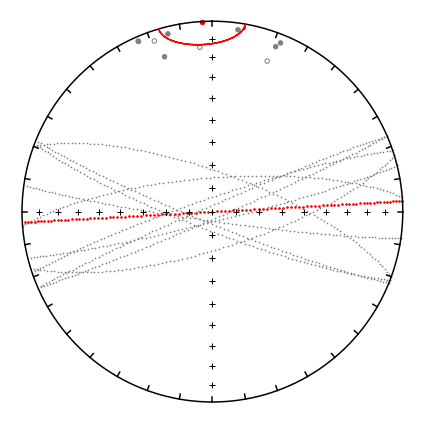

In [18]:
NED7_strikes = NED7_planes[' strike'].tolist()
NED7_dips = NED7_planes[' dip'].tolist()

NED7_pole_trend = NED7_planes['pole_trend'].tolist()
NED7_pole_plunge = NED7_planes['pole_plunge'].tolist()

NED7_mean_strike, NED7_mean_dip, NED7_pole_mean = mean_strike_dip(NED7_pole_trend, NED7_pole_plunge)

## NED8

Coordinates: 45.532800, -94.242283

Description: A diabase dike that is 0.28 meters in width that is intruding St. Cloud Granite. It is located 2.0 meters south of NED7.

In [19]:
NED8_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
46,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,3f691397e02101b2c95b8cd3cfa3df61,403007.3268,5042899.789,45.532880,-94.242202,15T,4.000000,...,84.881248,342.863556,252.863556,0.104983,Diabase Dike,Tue Jul 24 15:26:37 2018,NED8,NED8,342.863556,-5.118752
47,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,0f6f4a67cf0dab239258e4172157eaba,403007.3268,5042899.789,45.532880,-94.242202,15T,4.000000,...,87.854561,340.343079,250.343079,0.104983,Diabase Dike,Tue Jul 24 15:26:29 2018,NED8,NED8,340.343079,-2.145439
48,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,7e3b9eb4a2ab266dab3d35a122ffd699,403007.3268,5042899.789,45.532880,-94.242202,15T,4.000000,...,84.906555,339.480133,249.480133,0.104983,Diabase Dike,Tue Jul 24 15:26:06 2018,NED8,NED8,339.480133,-5.093445
49,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,a9ac446f3b6e52f67e502c2c23b07d4e,403006.2386,5042900.537,45.532886,-94.242217,15T,6.000000,...,85.350883,342.458466,252.458466,0.104983,Diabase Dike,Tue Jul 24 15:25:59 2018,NED8,NED8,342.458466,-4.649117
50,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,278b2628751462cd5ae88fb7a2d2ec03,403007.3268,5042899.789,45.532880,-94.242202,15T,6.000000,...,86.066864,343.745789,253.745789,0.104983,Diabase Dike,Tue Jul 24 15:25:41 2018,NED8,NED8,343.745789,-3.933136
51,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,0a19ea15cbae0e8f5f9d05dfa3acc9ca,403007.3268,5042899.789,45.532880,-94.242202,15T,6.000000,...,89.000000,342.488342,252.488342,0.104983,Diabase Dike,Tue Jul 24 15:25:33 2018,NED8,NED8,342.488342,-1.000000
125,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,ee1849b46b3f6a4f83f0dfe77b48e6d1,403079.1622,5042933.462,45.533193,-94.241289,15T,340.765626,...,89.000000,333.000000,243.000000,0.910000,Diabase dike,Wed Jul 25 09:17:30 2018,,NED8,333.000000,-1.000000
126,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,219050d6cc01160a4cd80deb843d99f3,403079.6217,5042933.544,45.533194,-94.241283,15T,341.153846,...,89.000000,315.000000,225.000000,0.910000,Diabase dike,Wed Jul 25 09:17:19 2018,,NED8,315.000000,-1.000000


Dec: 337.5  Inc: -3.0
Number of directions in mean (n): 8
Angular radius of 95% confidence (a_95): 6.8
Precision parameter (k) estimate: 68.3

mean strike: 247.4828471253448
mean dip: 86.97008786018256


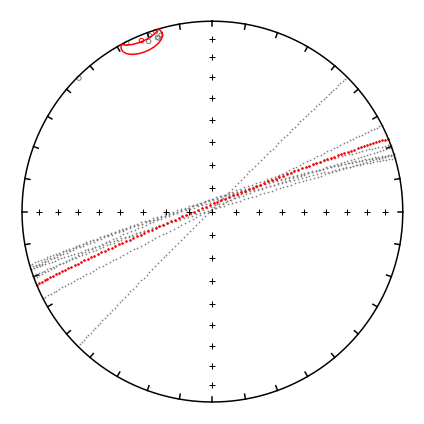

In [20]:
NED8_strikes = NED8_planes[' strike'].tolist()
NED8_dips = NED8_planes[' dip'].tolist()

NED8_pole_trend = NED8_planes['pole_trend'].tolist()
NED8_pole_plunge = NED8_planes['pole_plunge'].tolist()

NED8_mean_strike, NED8_mean_dip, NED8_pole_mean = mean_strike_dip(NED8_pole_trend, NED8_pole_plunge)

## NED9

Coordinates: 45.53306, -94.241497

Description: A diabase dike that has a minimum width of 2.9 meters. The dike's northern margin is quarry 13, while its southern margin is St. Cloud Granite. Glacial striations are evident on dike and granite. 

In [21]:
NED9_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
43,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,3de5f12a05eb6fc2e42e5594a29d5637,402998.4322,5042882.137,45.532720,-94.242313,15T,0.000000,...,84.691559,147.310150,57.310150,0.104983,Diabase Dike,Wed Jul 25 09:21:09 2018,NED9,NED9,-32.689850,5.308441
44,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,554cfe626ae698b161cde38d0b4a5f20,402998.4322,5042882.137,45.532720,-94.242313,15T,0.000000,...,82.372742,145.451279,55.451279,0.104983,Diabase Dike,Wed Jul 25 09:20:58 2018,NED9,NED9,-34.548721,7.627258
45,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,ee26e5c577134e776b4a8d432275cd17,402998.4322,5042882.137,45.532720,-94.242313,15T,0.000000,...,88.242668,142.205109,52.205109,0.104983,Diabase Dike,Wed Jul 25 09:20:47 2018,NED9,NED9,-37.794891,1.757332
122,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,4fb7ff47216fec7e4d00804fd8a899af,402998.6193,5042881.536,45.532714,-94.242310,15T,342.279005,...,86.000000,152.000000,62.000000,0.910000,Diabase dike,Wed Jul 25 09:21:22 2018,NED9,NED9,-28.000000,4.000000
123,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,f47400db0aa094c1e30b436063895b97,402994.4379,5042883.349,45.532730,-94.242364,15T,342.275333,...,89.000000,148.000000,58.000000,0.910000,Diabase dike,Wed Jul 25 09:21:14 2018,NED9,NED9,-32.000000,1.000000
124,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,60b27aad8ffe43932c274286cabf8183,403000.1615,5042879.246,45.532694,-94.242290,15T,342.275333,...,86.000000,148.000000,58.000000,0.910000,Diabase dike,Wed Jul 25 09:21:05 2018,,NED9,-32.000000,4.000000


Dec: 327.2  Inc: 4.0
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 3.3
Precision parameter (k) estimate: 405.5

mean strike: 57.16167392065853
mean dip: 86.04605846393194


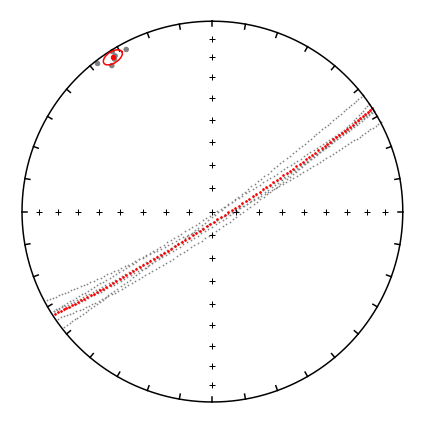

In [22]:
NED9_strikes = NED9_planes[' strike'].tolist()
NED9_dips = NED9_planes[' dip'].tolist()

NED9_pole_trend = NED9_planes['pole_trend'].tolist()
NED9_pole_plunge = NED9_planes['pole_plunge'].tolist()

NED9_mean_strike, NED9_mean_dip, NED9_pole_mean = mean_strike_dip(NED9_pole_trend, NED9_pole_plunge)

## NED10

Coordinates:  45°31'57.10"N,  94°14'33.27"W

Description: A diabase dike that is 2.3 meters in width. It forms the southwest bank of quarry 14 in Stearns County Quarry Park. Minimal contact exposure is present, with only 20 cm of heigth. 

In [23]:
NED10_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
40,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,ab19d62c31472c2b65eebf32afa8c66f,402974.0692,5042865.362,45.532565,-94.242621,15T,4.0,...,84.625435,330.637146,240.637146,0.104983,Diabase Dike,Wed Jul 25 09:42:57 2018,NED10,NED10,330.637146,-5.374565
41,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8d4be9848ca0797200513dc8f87abc00,402974.6472,5042864.216,45.532555,-94.242614,15T,3.0,...,82.628586,335.820496,245.820496,0.104983,Diabase Dike,Wed Jul 25 09:41:27 2018,NED10,NED10,335.820496,-7.371414
42,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,380427acbec058a8e07199627a2cdd8a,402974.6472,5042864.216,45.532555,-94.242614,15T,3.0,...,77.792633,328.246979,238.246979,0.104983,Diabase Dike,Wed Jul 25 09:41:10 2018,NED10,NED10,328.246979,-12.207367


Dec: 331.6  Inc: -8.3
Number of directions in mean (n): 3
Angular radius of 95% confidence (a_95): 7.9
Precision parameter (k) estimate: 243.5

mean strike: 241.5824066192887
mean dip: 81.67029398877696


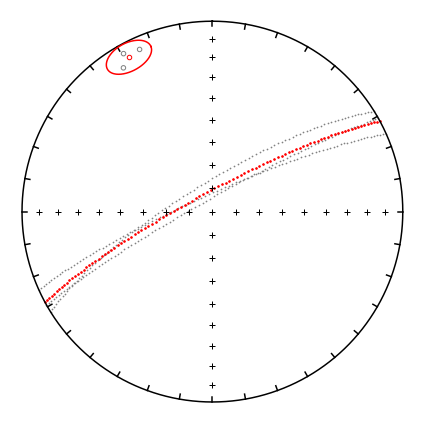

In [24]:
NED10_strikes = NED10_planes[' strike'].tolist()
NED10_dips = NED10_planes[' dip'].tolist()

NED10_pole_trend = NED10_planes['pole_trend'].tolist()
NED10_pole_plunge = NED10_planes['pole_plunge'].tolist()

NED10_mean_strike, NED10_mean_dip, NED10_pole_mean = mean_strike_dip(NED10_pole_trend, NED10_pole_plunge)

## NED11

Coordinates: 45.532525, -94.242423

Description: A diabase dike that is 1.4 meters in width that is intruding into St. Cloud Granite. The dike forms the southern wall of quarry 14 in Stearns County Quarry Park. It features a more northerly trend than other dikes surrounding quarry 14. 

In [25]:
NED11_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
38,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,5107ddc59a25689f6529719479d6599d,402990.1773,5042861.829,45.532536,-94.242415,15T,3.000000,...,77.096985,320.857178,230.857178,0.104983,Diabase Dike,Wed Jul 25 10:24:43 2018,NED11,NED11,320.857178,-12.903015
39,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,aa60b58a553cfd05fc4b43031d41f644,402989.2212,5042858.849,45.532509,-94.242426,15T,3.000000,...,80.374168,315.780701,225.780701,0.104983,Diabase Dike,Wed Jul 25 10:24:05 2018,NED11,NED11,315.780701,-9.625832
118,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,5e0187d40dd03507f3312b9bd880257f,402984.9505,5042856.568,45.532488,-94.242480,15T,340.321232,...,83.000000,321.000000,231.000000,0.910000,Diabase dike,Wed Jul 25 10:21:55 2018,NED11,NED11,321.000000,-7.000000
119,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,f5ad93a0fca183eaca0185fbb5ac1475,402988.8706,5042856.074,45.532484,-94.242430,15T,338.679996,...,86.000000,316.000000,226.000000,0.910000,Diabase dike,Wed Jul 25 10:21:15 2018,NED11,NED11,316.000000,-4.000000
120,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,0eb0aaada1b8dfa22ebe449f45cc59a7,402988.1290,5042857.222,45.532494,-94.242440,15T,337.920353,...,81.000000,320.000000,230.000000,0.910000,Diabase dike,Wed Jul 25 10:21:00 2018,NED11,NED11,320.000000,-9.000000
121,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,1b252bf080e9ca53f9a0535477a42028,402985.0549,5042860.777,45.532526,-94.242480,15T,342.059940,...,78.000000,325.000000,235.000000,0.910000,Diabase dike,Wed Jul 25 10:20:05 2018,NED11,NED11,325.000000,-12.000000


Dec: 319.8  Inc: -9.1
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 3.9
Precision parameter (k) estimate: 292.8

mean strike: 229.7578325132211
mean dip: 80.89768419081165


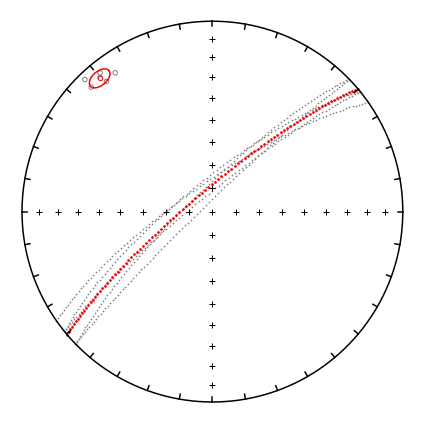

In [26]:
NED11_strikes = NED11_planes[' strike'].tolist()
NED11_dips = NED11_planes[' dip'].tolist()

NED11_pole_trend = NED11_planes['pole_trend'].tolist()
NED11_pole_plunge = NED11_planes['pole_plunge'].tolist()

NED11_mean_strike, NED11_mean_dip, NED11_pole_mean = mean_strike_dip(NED11_pole_trend, NED11_pole_plunge)

## NED12

Coordinates: 45.534877, -94.23913

Description: A diabase dike that is 0.47 meters in width that is intruding St. Cloud Granite. The dike is northeast of the rockwall, and is west of quarry 20 in Stearns County Quarry Park.

In [27]:
NED12_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
33,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,2a8c35ba9f92e24dc1a2503fd3cf73e1,403248.2629,5043115.757,45.534857,-94.239160,15T,4.000000,...,88.907959,340.415619,250.415619,0.104983,Diabase Dike,Wed Jul 25 13:24:22 2018,NED12,NED12,340.415619,-1.092041
34,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,f6da2eee4cec6f4cbf05f9ae50474205,403244.2287,5043115.638,45.534855,-94.239212,15T,4.000000,...,88.900566,151.216904,61.216904,0.104983,Diabase Dike,Wed Jul 25 13:24:08 2018,NED12,NED12,-28.783096,1.099434
35,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8f85597ca073764ea252ed7702d22480,403244.2287,5043115.638,45.534855,-94.239212,15T,4.000000,...,82.263206,332.312164,242.312164,0.104983,Diabase Dike,Wed Jul 25 13:23:41 2018,NED12,NED12,332.312164,-7.736794
36,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,fc9a984b802b51f759a6e1092ad690fd,403244.2287,5043115.638,45.534855,-94.239212,15T,4.000000,...,89.000000,339.139710,249.139710,0.104983,Diabase Dike,Wed Jul 25 13:23:20 2018,NED12,NED12,339.139709,-1.000000
37,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,c086101531f8c3fded93c36f46671f8a,403236.5172,5043119.012,45.534885,-94.239311,15T,3.000000,...,87.600967,155.926697,65.926697,0.104983,Diabase Dike,Wed Jul 25 12:23:18 2018,,NED12,-24.073303,2.399033
115,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,63e3f7bc8c66f331d49a8015bdb47a6c,403250.1457,5043121.959,45.534913,-94.239137,15T,342.349288,...,85.000000,337.000000,247.000000,0.910000,Diabase dike,Wed Jul 25 13:18:15 2018,,NED12,337.000000,-5.000000
116,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,63b4f21b4d8d9dcf7baf99053491779f,403255.0823,5043128.808,45.534975,-94.239075,15T,342.950782,...,89.000000,320.000000,230.000000,0.910000,Diabase dike,Wed Jul 25 13:15:57 2018,,NED12,320.000000,-1.000000


Dec: 333.7  Inc: -1.8
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 5.8
Precision parameter (k) estimate: 109.9

mean strike: 243.730951858558
mean dip: 88.2286032182926


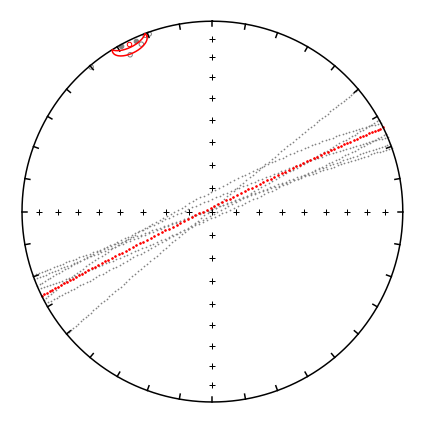

In [28]:
NED12_strikes = NED12_planes[' strike'].tolist()
NED12_dips = NED12_planes[' dip'].tolist()

NED12_pole_trend = NED12_planes['pole_trend'].tolist()
NED12_pole_plunge = NED12_planes['pole_plunge'].tolist()

NED12_mean_strike, NED12_mean_dip, NED12_pole_mean = mean_strike_dip(NED12_pole_trend, NED12_pole_plunge)

## NED13

Coordinates: 45.535034, -94.238935

Description: A diabase dike that is 0.74 meters in width that is intruding St. Cloud Granite. The dike is located 5.3 meters south of NED12.

In [29]:
NED13_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
30,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,9fbd22925eb850fa010ca6c203c46f13,403271.0975,5043124.379,45.534938,-94.238869,15T,3.000000,...,85.511765,339.293579,249.293579,0.104983,Diabase Dike,Wed Jul 25 14:26:55 2018,,NED13,339.293579,-4.488235
31,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,cc7ba6f3b7aa90aa6621157ae4c92af0,403269.6748,5043124.238,45.534936,-94.238888,15T,4.000000,...,84.921494,335.191193,245.191193,0.104983,Diabase Dike,Wed Jul 25 14:26:40 2018,NED13,NED13,335.191193,-5.078506
32,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,6de0b2b7b5566fd31b687bce95dfbb12,403270.9042,5043124.582,45.534939,-94.238872,15T,3.000000,...,85.228043,346.554260,256.554260,0.104983,Diabase Dike,Wed Jul 25 14:24:44 2018,NED13,NED13,346.554260,-4.771957
117,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,dd4fee12a058ec463433b0bf201569c9,403272.0651,5043128.118,45.534971,-94.238858,15T,340.514286,...,85.000000,151.000000,61.000000,0.910000,Diabase dike,Wed Jul 25 12:29:26 2018,,NED13,-29.000000,5.000000


Dec: 338.0  Inc: -2.4
Number of directions in mean (n): 4
Angular radius of 95% confidence (a_95): 9.4
Precision parameter (k) estimate: 97.1

mean strike: 248.00751135615633
mean dip: 87.64912048097398


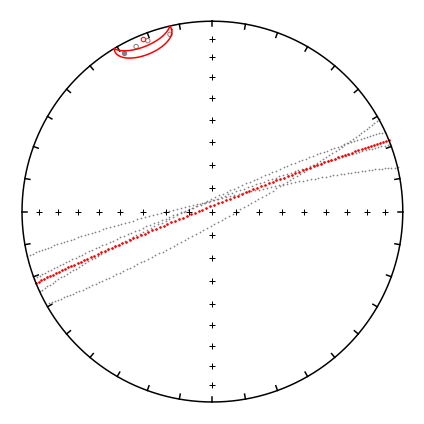

In [30]:
NED13_strikes = NED13_planes[' strike'].tolist()
NED13_dips = NED13_planes[' dip'].tolist()

NED13_pole_trend = NED13_planes['pole_trend'].tolist()
NED13_pole_plunge = NED13_planes['pole_plunge'].tolist()

NED13_mean_strike, NED13_mean_dip, NED13_pole_mean = mean_strike_dip(NED13_pole_trend, NED13_pole_plunge)

## NED14

Coordinates: 45.534955, -94.238863

Description: A diabase dike that has a minimum width of 1.0 meters. The north contact is exposed while the south contact is not.

In [31]:
NED14_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
26,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,b2a5560c700e300b92becdb9d96f7b37,403275.9363,5043124.039,45.534935,-94.238807,15T,3.000000,...,88.262321,344.119843,254.119842,0.104983,Diabase Dike,Wed Jul 25 15:42:28 2018,NED14,NED14,344.119843,-1.737679
27,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,3edc920df476a7e2362ebd9b4f530432,403274.6105,5043117.451,45.534876,-94.238823,15T,4.000000,...,87.565781,158.688080,68.688080,0.104983,Diabase Dike,Wed Jul 25 15:41:50 2018,NED14,NED14,-21.311920,2.434219
28,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,1b63151c86f294614b6a9025e2a7095a,403274.6105,5043117.451,45.534876,-94.238823,15T,4.000000,...,88.898773,338.634369,248.634369,0.104983,Diabase Dike,Wed Jul 25 15:41:30 2018,NED14,NED14,338.634369,-1.101227
29,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,406bfdf30b7d696666ef3536cd33e3db,403268.3751,5043111.702,45.534823,-94.238902,15T,4.000000,...,88.755760,345.105255,255.105255,0.104983,Diabase Dike,Wed Jul 25 15:41:18 2018,NED14,NED14,345.105255,-1.244240
114,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,abbc0ba86c8b044448483a44c6dcc7ed,403274.2969,5043124.274,45.534937,-94.238829,15T,334.586857,...,89.000000,346.000000,256.000000,0.910000,Diabase dike,Wed Jul 25 14:37:36 2018,,NED14,346.000000,-1.000000


Dec: 342.5  Inc: -0.5
Number of directions in mean (n): 5
Angular radius of 95% confidence (a_95): 3.7
Precision parameter (k) estimate: 420.9

mean strike: 252.51047216906125
mean dip: 89.4691483786092


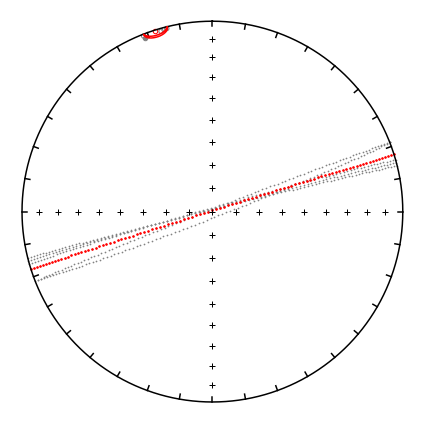

In [32]:
NED14_strikes = NED14_planes[' strike'].tolist()
NED14_dips = NED14_planes[' dip'].tolist()

NED14_pole_trend = NED14_planes['pole_trend'].tolist()
NED14_pole_plunge = NED14_planes['pole_plunge'].tolist()

NED14_mean_strike, NED14_mean_dip, NED14_pole_mean = mean_strike_dip(NED14_pole_trend, NED14_pole_plunge)

## NED15

Coordinates: 45.536908, -94.231647

Description: A diabase dike that is >=1.3 meters in width. It forms the southern wall of quarry 1 is Stearns County Quarry Park. The north margin is water, while the south margin is St. Cloud Granite. 

In [33]:
NED15_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
21,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,2f1891cfb554a05a9bbc532d08ab3e14,403777.5909,5043333.158,45.536887,-94.232425,15T,3.000000,...,83.914238,154.502975,64.502975,0.104983,Diabase Dike,Thu Jul 26 09:57:59 2018,NED15,NED15,-25.497025,6.085762
22,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8c0f7cb86331c5330e2a20c6748644f4,403777.5909,5043333.158,45.536887,-94.232425,15T,3.000000,...,85.446220,154.254303,64.254303,0.104983,Diabase Dike,Thu Jul 26 09:57:46 2018,NED15,NED15,-25.745697,4.553780
23,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8eccedbe1e5a74e51d068ffcf0f0031a,403777.5909,5043333.158,45.536887,-94.232425,15T,3.000000,...,84.174561,162.944794,72.944794,0.104983,Diabase Dike,Thu Jul 26 09:55:11 2018,NED15,NED15,-17.055206,5.825439
24,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,aa4cea951ced69d6b4a49e19bb34b7fe,403777.5909,5043333.158,45.536887,-94.232425,15T,3.000000,...,83.113647,152.708603,62.708603,0.104983,Diabase Dike,Thu Jul 26 09:54:40 2018,NED15,NED15,-27.291397,6.886353
25,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,5a31f5920edb8407dc30024cca423d95,403777.5909,5043333.158,45.536887,-94.232425,15T,3.000000,...,82.134491,155.171234,65.171234,0.104983,Diabase Dike,Thu Jul 26 09:54:02 2018,NED15,NED15,-24.828766,7.865509
112,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,0790600b844a27f9f639796781d847bb,403788.1525,5043337.215,45.536925,-94.232291,15T,331.077702,...,85.000000,156.000000,66.000000,0.910000,Diabase dike,Thu Jul 26 09:53:30 2018,,NED15,-24.000000,5.000000
113,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,ed2e19571e4d8642b6bd669eb9fb0322,403788.5723,5043337.697,45.536929,-94.232285,15T,331.645451,...,84.000000,162.000000,72.000000,0.910000,Diabase dike,Thu Jul 26 09:53:14 2018,,NED15,-18.000000,6.000000


Dec: 336.8  Inc: 6.0
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 3.1
Precision parameter (k) estimate: 383.1

mean strike: 66.79667223378783
mean dip: 83.95644022195329


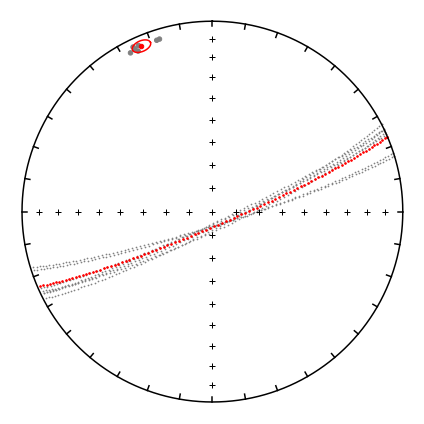

In [34]:
NED15_strikes = NED15_planes[' strike'].tolist()
NED15_dips = NED15_planes[' dip'].tolist()

NED15_pole_trend = NED15_planes['pole_trend'].tolist()
NED15_pole_plunge = NED15_planes['pole_plunge'].tolist()

NED15_mean_strike, NED15_mean_dip, NED15_pole_mean = mean_strike_dip(NED15_pole_trend, NED15_pole_plunge)

## NED16

Coordinates: 45.537344, -94.231812

Description: A diabase dike with a minimum width of 1.4 meters. The dike forms the north wall of quarry 1 in Stearns County Quarry Park. Neither margin is exposed. Some evidence of alteration is present in the form of yellow-gold sulfides and brown pyroxenes. No plane measurements were taken due to lack of exposed margins. 

Orientation: trend of 059

In [35]:
NED17_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
2,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,e9ebc2251aab1231abf8ad1c419f994c,403859.0303,5043038.970,45.534250,-94.231324,15T,4.0,...,84.997368,156.604111,66.604111,0.104983,Diabase Dike,Fri Jul 27 10:18:53 2018,NED17,NED17,-23.395889,5.002632
3,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,bf64a51e6c760e2cbb4d7cd05926ec65,403859.0303,5043038.970,45.534250,-94.231324,15T,4.0,...,86.732018,158.127136,68.127136,0.104983,Diabase Dike,Fri Jul 27 09:13:30 2018,NED17,NED17,-21.872864,3.267982
4,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,55312b8197ac6a5a7298abd2ecb76630,403861.3941,5043039.012,45.534251,-94.231294,15T,4.0,...,85.431992,158.167770,68.167770,0.104983,Diabase Dike,Fri Jul 27 09:13:12 2018,NED17,NED17,-21.832230,4.568008
5,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,00e28bb7363d430fda74bcefee3ebb3f,403862.4245,5043051.566,45.534364,-94.231283,15T,6.0,...,85.359169,164.017502,74.017502,0.104983,Diabase Dike,Fri Jul 27 09:12:51 2018,NED17,NED17,-15.982498,4.640831
6,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,7e3af0ae28515a926b22e68f1f9463f9,403861.7938,5043053.122,45.534378,-94.231292,15T,6.0,...,81.282005,160.710190,70.710190,0.104983,Diabase Dike,Fri Jul 27 09:12:26 2018,NED17,NED17,-19.289810,8.717995
7,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,65b8dadf59d50a7443e39aac94686c75,403858.2800,5043049.376,45.534344,-94.231336,15T,8.0,...,88.013321,163.913864,73.913864,0.104983,Diabase Dike,Fri Jul 27 09:12:01 2018,NED17,NED17,-16.086136,1.986679


Dec: 340.3  Inc: 4.7
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 3.2
Precision parameter (k) estimate: 435.9

mean strike: 70.25717846004756
mean dip: 85.29705753135548


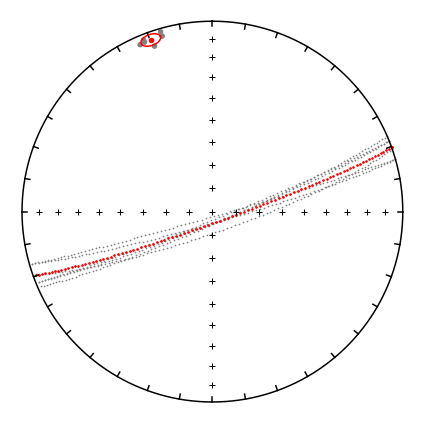

In [36]:
NED17_strikes = NED17_planes[' strike'].tolist()
NED17_dips = NED17_planes[' dip'].tolist()

NED17_pole_trend = NED17_planes['pole_trend'].tolist()
NED17_pole_plunge = NED17_planes['pole_plunge'].tolist()

NED17_mean_strike, NED17_mean_dip, NED17_pole_mean = mean_strike_dip(NED17_pole_trend, NED17_pole_plunge)

## NED18

Coordinates:  45°31'52.41"N,  94°13'50.01"W

Description: A diabase dike with a width of 0.85 meters intruded into St. Cloud Granite. It features irregular orientations. 

In [37]:
NED18_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
13,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,56357c64552d326d8d7dc102cc793296,403913.9670,5042700.918,45.531216,-94.230555,15T,3.000000,...,85.492523,171.431244,81.431244,0.104983,Diabase Dike,Thu Jul 26 17:23:17 2018,NED18,NED18,-8.568756,4.507477
14,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,ea4dde32bdba20f12154fd57cf5a76ad,403915.5556,5042701.201,45.531219,-94.230534,15T,4.000000,...,85.004608,153.421997,63.421997,0.104983,Diabase Dike,Thu Jul 26 17:22:52 2018,NED18,NED18,-26.578003,4.995392
15,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,7e17bd8488fac91e3708977db7720b02,403915.5116,5042702.175,45.531227,-94.230535,15T,4.000000,...,82.560982,154.436630,64.436630,0.104983,Diabase Dike,Thu Jul 26 17:22:29 2018,NED18,NED18,-25.563370,7.439018
16,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,93202835acb6551cf9d64cde26a228c9,403911.7689,5042701.865,45.531224,-94.230583,15T,4.000000,...,83.227638,184.687042,94.687042,0.104983,Diabase Dike,Thu Jul 26 17:21:43 2018,NED18,NED18,4.687042,6.772362
107,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,38b2cdf73ee09e3da00f1f40ecbba718,403915.9438,5042702.611,45.531231,-94.230530,15T,335.454714,...,85.000000,169.000000,79.000000,0.910000,Diabase dike,Thu Jul 26 17:19:21 2018,,NED18,-11.000000,5.000000
108,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,c6dfd2783b78f389d77ac5ba877c4aab,403915.9438,5042702.611,45.531231,-94.230530,15T,335.454714,...,89.000000,173.000000,83.000000,0.910000,Diabase dike,Thu Jul 26 17:19:13 2018,,NED18,-7.000000,1.000000
109,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,37ea15ec80650e620d566b79777cfc03,403913.6915,5042700.452,45.531212,-94.230558,15T,336.025578,...,83.000000,163.000000,73.000000,0.910000,Diabase dike,Thu Jul 26 17:15:43 2018,,NED18,-17.000000,7.000000
110,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,49fd40f7cba18bfbc1ce89b4b9e2162b,403911.4893,5042703.271,45.531237,-94.230587,15T,337.471012,...,80.000000,158.000000,68.000000,0.910000,Diabase dike,Thu Jul 26 17:13:42 2018,,NED18,-22.000000,10.000000


Dec: 345.9  Inc: 5.9
Number of directions in mean (n): 8
Angular radius of 95% confidence (a_95): 7.5
Precision parameter (k) estimate: 55.0

mean strike: 75.86682145763604
mean dip: 84.07117471318402


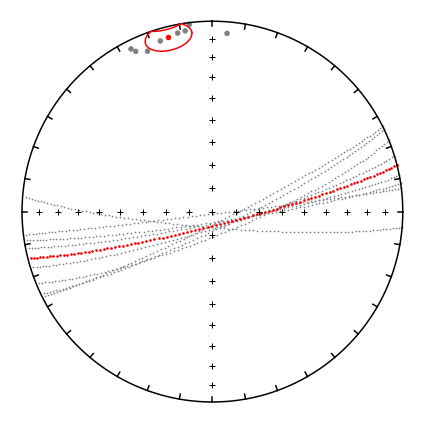

In [38]:
NED18_strikes = NED18_planes[' strike'].tolist()
NED18_dips = NED18_planes[' dip'].tolist()

NED18_pole_trend = NED18_planes['pole_trend'].tolist()
NED18_pole_plunge = NED18_planes['pole_plunge'].tolist()

NED18_mean_strike, NED18_mean_dip, NED18_pole_mean = mean_strike_dip(NED18_pole_trend, NED18_pole_plunge)

## NED19

Coordinates: 45.530150, -94.234122

Description: A diabase dike with a width of 1.0 meters, then branching into two with widths of 0.35 meters and 0.77 meters. The dike intrudes Reformatory Granodiorite.

In [39]:
NED19_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
10,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,49983059ef11bdd49c676461580e37ac,403632.6597,5042592.236,45.530199,-94.234135,15T,3.000000,...,77.838661,151.523163,61.523163,0.104983,Diabase Dike,Thu Jul 26 18:31:26 2018,,NED19,-28.476837,12.161339
11,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,6e849a09e555d057a13b856d014b6edf,403633.0332,5042596.520,45.530238,-94.234131,15T,4.000000,...,79.064095,155.245239,65.245239,0.104983,Diabase Dike,Thu Jul 26 18:31:17 2018,,NED19,-24.754761,10.935905
12,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8bfd78896656865572b6bc57c3ea5cf2,404336.4423,5043394.692,45.537517,-94.225281,15T,29.246792,...,77.047073,151.832474,61.832474,0.104983,Diabase Dike,Thu Jul 26 18:30:54 2018,,NED19,-28.167526,12.952927
93,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,98a5b3f8b89a592547d65c2bff9c8d7e,403635.8853,5042590.841,45.530187,-94.234093,15T,343.359974,...,80.000000,152.000000,62.000000,0.910000,Diabase dike,Fri Jul 27 13:00:45 2018,,NED19,-28.000000,10.000000
94,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,4fb849f47040c70ddaec9fe6c9dd1aca,403633.5218,5042592.535,45.530202,-94.234124,15T,343.647741,...,79.000000,139.000000,49.000000,0.910000,Diabase dike,Fri Jul 27 12:59:46 2018,,NED19,-41.000000,11.000000
105,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,ccaf5d08641e36639f701bf108e0812e,403633.2843,5042594.970,45.530224,-94.234128,15T,347.215878,...,82.000000,146.000000,56.000000,0.910000,Diabase dike,Thu Jul 26 18:23:27 2018,,NED19,-34.000000,8.000000
106,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,cd1b728a2792173ce3ae47d572200a29,403633.2843,5042594.970,45.530224,-94.234128,15T,347.215878,...,75.000000,140.000000,50.000000,0.910000,Diabase dike,Thu Jul 26 18:23:06 2018,,NED19,-40.000000,15.000000


Dec: 328.0  Inc: 11.5
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 5.0
Precision parameter (k) estimate: 149.4

mean strike: 57.95953749635146
mean dip: 78.50496527873429


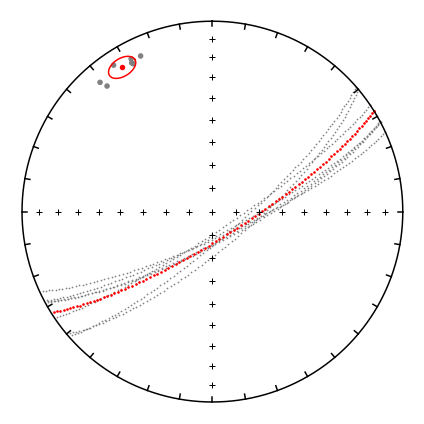

In [40]:
NED19_strikes = NED19_planes[' strike'].tolist()
NED19_dips = NED19_planes[' dip'].tolist()

NED19_pole_trend = NED19_planes['pole_trend'].tolist()
NED19_pole_plunge = NED19_planes['pole_plunge'].tolist()

NED19_mean_strike, NED19_mean_dip, NED19_pole_mean = mean_strike_dip(NED19_pole_trend, NED19_pole_plunge)

## NED22

Coordinates: 45.533848, -94.257488

Description: 20 cm of fine-grained NE-trending dike exposure with NW chilled margin preserved

Dec: 333.9  Inc: 2.5
Number of directions in mean (n): 5
Angular radius of 95% confidence (a_95): 5.6
Precision parameter (k) estimate: 191.0

mean strike: 63.85629315549096
mean dip: 87.45142159846424


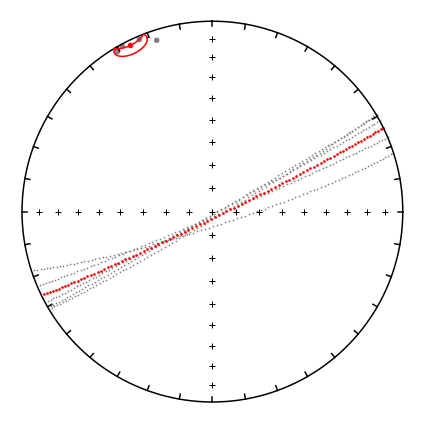

In [41]:
NED22_strikes = NED22_planes[' strike'].tolist()
NED22_dips = NED22_planes[' dip'].tolist()

NED22_pole_trend = NED22_planes['pole_trend'].tolist()
NED22_pole_plunge = NED22_planes['pole_plunge'].tolist()

NED22_mean_strike, NED22_mean_dip, NED22_pole_mean = mean_strike_dip(NED22_pole_trend, NED22_pole_plunge)

## NED23

Coordinates: 45.53399165, -94.25800949

Description: Dike with a minimum thickness of 1.2 meters

Dec: 330.7  Inc: 13.2
Number of directions in mean (n): 3
Angular radius of 95% confidence (a_95): 10.0
Precision parameter (k) estimate: 153.8

mean strike: 60.730492010074386
mean dip: 76.76633020403777


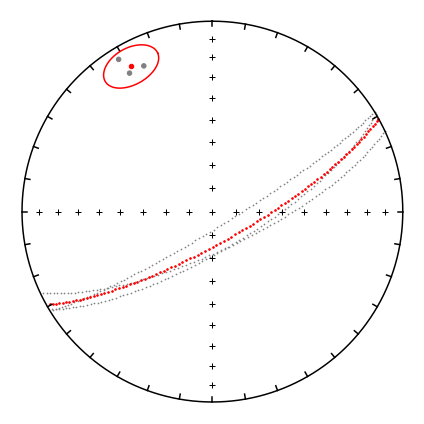

In [42]:
NED23_strikes = NED23_planes[' strike'].tolist()
NED23_dips = NED23_planes[' dip'].tolist()

NED23_pole_trend = NED23_planes['pole_trend'].tolist()
NED23_pole_plunge = NED23_planes['pole_plunge'].tolist()

NED23_mean_strike, NED23_mean_dip, NED23_pole_mean = mean_strike_dip(NED23_pole_trend, NED23_pole_plunge)

## NED24

Coordinates: 45.53423518, -94.25822583

Description: Thin (4 to 7 cm thick dike)

Dec: 337.4  Inc: 1.5
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 7.6
Precision parameter (k) estimate: 64.1

mean strike: 67.4387052562945
mean dip: 88.51882415352635


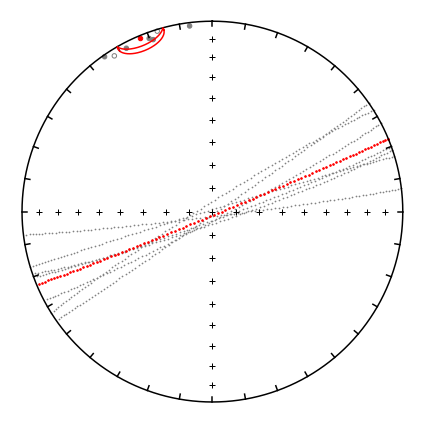

In [43]:
NED24_strikes = NED24_planes[' strike'].tolist()
NED24_dips = NED24_planes[' dip'].tolist()

NED24_pole_trend = NED24_planes['pole_trend'].tolist()
NED24_pole_plunge = NED24_planes['pole_plunge'].tolist()

NED24_mean_strike, NED24_mean_dip, NED24_pole_mean = mean_strike_dip(NED24_pole_trend, NED24_pole_plunge)

## NED32

Coordinates: 45.528334, -94.240892

Description: 35 cm thick fine-grained diabase dike

Dec: 359.8  Inc: -0.9
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 15.7
Precision parameter (k) estimate: 19.1

mean strike: 269.7799648878337
mean dip: 89.1361455153267


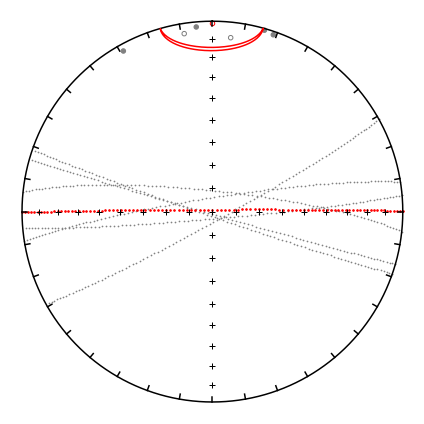

In [44]:
NED32_strikes = NED32_planes[' strike'].tolist()
NED32_dips = NED32_planes[' dip'].tolist()

NED32_pole_trend = NED32_planes['pole_trend'].tolist()
NED32_pole_plunge = NED32_planes['pole_plunge'].tolist()

NED32_mean_strike, NED32_mean_dip, NED32_pole_mean = mean_strike_dip(NED32_pole_trend, NED32_pole_plunge)

## NED34

Coordinates: 45.51701892, -94.21927077

Description: 18 cm thick fine-grained diabase dike. Both margins are well-exposed.

Dec: 342.8  Inc: 2.6
Number of directions in mean (n): 9
Angular radius of 95% confidence (a_95): 5.0
Precision parameter (k) estimate: 106.4

mean strike: 72.75097046812868
mean dip: 87.4293112871001


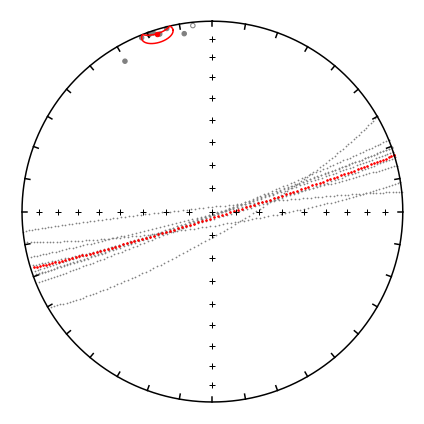

In [45]:
NED34_strikes = NED34_planes[' strike'].tolist()
NED34_dips = NED34_planes[' dip'].tolist()

NED34_pole_trend = NED34_planes['pole_trend'].tolist()
NED34_pole_plunge = NED34_planes['pole_plunge'].tolist()

NED34_mean_strike, NED34_mean_dip, NED34_pole_mean = mean_strike_dip(NED34_pole_trend, NED34_pole_plunge)

## NED35

Coordinates: 45.533256, -94.242365

Description: This diabase dike was sampled from a canoe in quarry park.

In [46]:
NED35_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
157,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,7542b0e528e728852f5edac05508f371,402992.7560,5042943.848,45.533274,-94.242398,15T,3.0,...,82.076897,135.889694,45.889694,0.93869,Diabase Dike,Sat Aug 10 13:46:23 2019,NaN,NED35,-44.110306,7.923103
158,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,92ce5b90e956d953127d28cb6773bda0,402992.2879,5042940.679,45.533246,-94.242403,15T,3.0,...,85.454399,151.410080,61.410080,0.93869,Diabase Dike,Sat Aug 10 13:46:03 2019,NaN,NED35,-28.589920,4.545601
159,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,21de1e4cea58b551c4a416aadb1dfacd,402995.5355,5042940.717,45.533247,-94.242362,15T,3.0,...,88.227196,150.620727,60.620728,0.93869,Diabase Dike,Sat Aug 10 13:45:54 2019,NaN,NED35,-29.379272,1.772804
160,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,2d172438596f4cc44e5eac3403ca9e9a,402996.8077,5042939.594,45.533237,-94.242345,15T,3.0,...,86.762543,145.619781,55.619781,0.93869,Diabase Dike,Sat Aug 10 13:45:44 2019,NaN,NED35,-34.380219,3.237457
161,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,10f2b44e48cdb1aa1473f1e528ca3cf6,402995.2841,5042941.820,45.533256,-94.242365,15T,3.0,...,83.138153,148.747025,58.747025,0.93869,Diabase Dike,Sat Aug 10 13:45:31 2019,NaN,NED35,-31.252975,6.861847
162,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,9dca4b93bf82b523fd7931921f6ebe2b,402996.8012,5042940.870,45.533248,-94.242345,15T,4.0,...,86.889587,167.738022,77.738022,0.93869,Diabase Dike,Sat Aug 10 13:45:18 2019,NaN,NED35,-12.261978,3.110413
163,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,6e09efc4f3c01b90a003079be39e6540,402995.2064,5042939.335,45.533234,-94.242366,15T,4.0,...,85.573914,351.661865,261.661865,0.93869,Diabase Dike,Sat Aug 10 13:45:07 2019,NaN,NED35,351.661865,-4.426086
164,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,d8985d3811da1382f8134c994c803019,402997.7750,5042931.461,45.533164,-94.242331,15T,4.0,...,84.914749,161.484573,71.484573,0.93869,Diabase Dike,Sat Aug 10 13:44:22 2019,NaN,NED35,-18.515427,5.085251


Dec: 334.2  Inc: 3.6
Number of directions in mean (n): 8
Angular radius of 95% confidence (a_95): 8.6
Precision parameter (k) estimate: 42.3

mean strike: 64.15479914406518
mean dip: 86.41622008271771


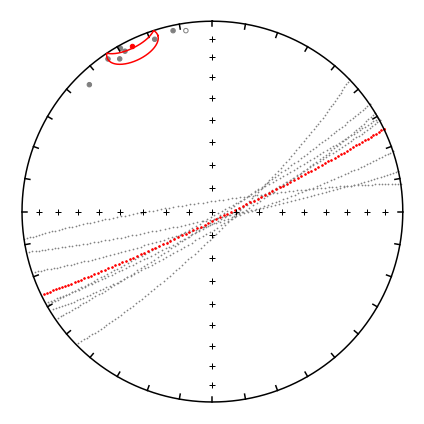

In [47]:
NED35_strikes = NED35_planes[' strike'].tolist()
NED35_dips = NED35_planes[' dip'].tolist()

NED35_pole_trend = NED35_planes['pole_trend'].tolist()
NED35_pole_plunge = NED35_planes['pole_plunge'].tolist()

NED35_mean_strike, NED35_mean_dip, NED35_pole_mean = mean_strike_dip(NED35_pole_trend, NED35_pole_plunge)

## NED36

Coordinates: 45.53465, -94.26327

Description: A diabase dike sampled in a quarry on private land where the dike formed the quarry wall

In [48]:
NED36_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
150,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,8aa685c72fb26cb6b1b773cdeac10bf9,401360.3330,5043122.198,45.534650,-94.263336,15T,3.0,...,81.969376,152.726273,62.726273,0.93869,Diabase Dike,Sat Aug 10 16:28:56 2019,NaN,NED36,-27.273727,8.030624
151,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,445a2bdc642100eec3098a675af7eff4,401361.3564,5043124.837,45.534674,-94.263323,15T,3.0,...,79.094582,160.085419,70.085419,0.93869,Diabase Dike,Sat Aug 10 16:28:46 2019,NaN,NED36,-19.914581,10.905418
152,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,3ea28bed429031c28304dd40c7446b78,401363.1107,5043122.336,45.534652,-94.263300,15T,3.0,...,76.826431,156.045288,66.045288,0.93869,Diabase Dike,Sat Aug 10 16:28:24 2019,NaN,NED36,-23.954712,13.173569
153,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,424cfb66fc33d879c8ec72203415c54b,401365.6393,5043122.450,45.534653,-94.263268,15T,3.0,...,74.616074,163.507309,73.507309,0.93869,Diabase Dike,Sat Aug 10 16:27:56 2019,NaN,NED36,-16.492691,15.383926
154,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,c36bae9d6dd9c3d5635c8fecf8164157,401365.6393,5043122.450,45.534653,-94.263268,15T,3.0,...,83.493118,153.953751,63.953751,0.93869,Diabase Dike,Sat Aug 10 16:27:49 2019,NaN,NED36,-26.046249,6.506882
155,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,658fb6fcef3f561eb37be1534093e016,401365.6393,5043122.450,45.534653,-94.263268,15T,3.0,...,74.307022,157.188446,67.188446,0.93869,Diabase Dike,Sat Aug 10 16:27:37 2019,NaN,NED36,-22.811554,15.692978
156,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,1a14bde16cd8caa0c49939dbda21ac35,401364.0866,5043122.372,45.534652,-94.263287,15T,3.0,...,74.680977,157.622696,67.622696,0.93869,Diabase Dike,Sat Aug 10 16:27:30 2019,NaN,NED36,-22.377304,15.319023


Dec: 337.3  Inc: 12.2
Number of directions in mean (n): 7
Angular radius of 95% confidence (a_95): 3.9
Precision parameter (k) estimate: 244.9

mean strike: 67.2769176455588
mean dip: 77.83377646374468


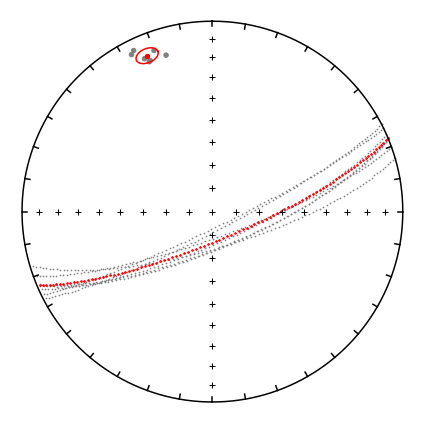

In [49]:
NED36_strikes = NED36_planes[' strike'].tolist()
NED36_dips = NED36_planes[' dip'].tolist()

NED36_pole_trend = NED36_planes['pole_trend'].tolist()
NED36_pole_plunge = NED36_planes['pole_plunge'].tolist()

NED36_mean_strike, NED36_mean_dip, NED36_pole_mean = mean_strike_dip(NED36_pole_trend, NED36_pole_plunge)

## NED37

Coordinates: 45.530150, -94.234122

Description: A 3 cm thick diabase dike in middle of quarry in which we sampled NED37. Too thin and difficult to sample to be a priority. However, orientation measurements were collecteable.

In [50]:
NED37_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
138,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,6e729d69031c4d6e2b92dd42c9f33bac,401379.2815,5043116.638,45.534603,-94.263092,15T,3.0,...,88.527412,155.672745,65.672745,0.93869,Diabase Dike,Sat Aug 10 17:19:11 2019,not sampled for pmag,NED37,-24.327255,1.472588
139,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,a84c169180387cbf3d0efa62bc98bad8,401374.5045,5043128.393,45.534708,-94.263155,15T,3.0,...,89.000000,338.891968,248.891968,0.93869,Diabase Dike,Sat Aug 10 17:18:37 2019,not sampled for pmag,NED37,338.891968,-1.000000
140,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,72bad296a9a1e3c2ac0a99324a0ef1e2,401372.1976,5043132.379,45.534743,-94.263186,15T,3.0,...,89.000000,154.452850,64.452850,0.93869,Diabase Dike,Sat Aug 10 17:18:19 2019,not sampled for pmag,NED37,-25.547150,1.000000
141,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,4d13883e0e2479eebdc8af55bde7c347,401378.4677,5043127.739,45.534702,-94.263104,15T,4.0,...,86.261498,339.686615,249.686615,0.93869,Diabase Dike,Sat Aug 10 17:18:02 2019,not sampled for pmag,NED37,339.686615,-3.738502
142,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,aede1a0dadafab58b8bdd7aaf241a7eb,401382.7249,5043120.807,45.534641,-94.263049,15T,4.0,...,89.000000,340.197113,250.197113,0.93869,Diabase Dike,Sat Aug 10 17:17:49 2019,not sampled for pmag,NED37,340.197113,-1.000000
143,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,69edae964949ffdc752ae4259da29179,401382.6011,5043118.350,45.534619,-94.263050,15T,4.0,...,87.642166,159.368179,69.368179,0.93869,Diabase Dike,Sat Aug 10 17:17:39 2019,not sampled for pmag,NED37,-20.631821,2.357834
144,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,a2f1b8e054f84e403f47d5d06d3bc736,401382.0137,5043113.050,45.534571,-94.263056,15T,3.0,...,89.000000,152.484284,62.484283,0.93869,Diabase Dike,Sat Aug 10 17:17:19 2019,not sampled for pmag,NED37,-27.515717,1.000000
145,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,0e9d3c741a0e03f24a89039c71be8c9f,401382.0137,5043113.050,45.534571,-94.263056,15T,3.0,...,87.046852,147.279526,57.279526,0.93869,Diabase Dike,Sat Aug 10 17:17:05 2019,not sampled for pmag,NED37,-32.720474,2.953148
146,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,339455e020b412c041cbcfda9ffb8d9f,401382.1502,5043112.159,45.534563,-94.263054,15T,3.0,...,85.819748,149.228577,59.228577,0.93869,Diabase Dike,Sat Aug 10 17:16:54 2019,not sampled for pmag,NED37,-30.771423,4.180252
147,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,705a541c04c4a91c553954df196c137c,401383.2154,5043111.211,45.534554,-94.263040,15T,4.0,...,89.000000,341.283936,251.283936,0.93869,Diabase Dike,Sat Aug 10 17:16:43 2019,not sampled for pmag,NED37,341.283936,-1.000000


Dec: 336.1  Inc: 0.8
Number of directions in mean (n): 12
Angular radius of 95% confidence (a_95): 2.9
Precision parameter (k) estimate: 230.4

mean strike: 66.08186055938177
mean dip: 89.24107809448563


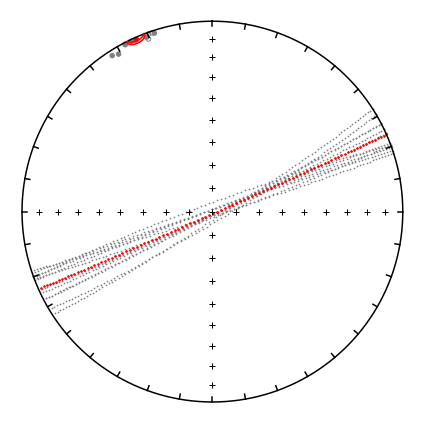

In [51]:
NED37_strikes = NED37_planes[' strike'].tolist()
NED37_dips = NED37_planes[' dip'].tolist()

NED37_pole_trend = NED37_planes['pole_trend'].tolist()
NED37_pole_plunge = NED37_planes['pole_plunge'].tolist()

NED37_mean_strike, NED37_mean_dip, NED37_pole_mean = mean_strike_dip(NED37_pole_trend, NED37_pole_plunge)

## NWD1

Coordinates: 45.533756, -94.231065

Description: A diabase dike that is 7.9 meters in width that intrudes St. Cloud Granite. The dike forms the southern wall of quarry 3 at Stearns County Quarry Park, and crosscuts NED17. It extends southward about 50 meters from the southern edge of the quarry. Plagioclase crystals are present in NWD1 that are not present in NED17.

In [52]:
NWD1_planes

,user,localityId,localityName,dataId,x,y,latitude,longitude,zone,altitude,...,dip,dipAzimuth,strike,declination,unitId,timedate,notes,dike ID,pole_trend,pole_plunge
0,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,15b9bb974d2023bfdf461b59373f0482,403853.8778,5043052.149,45.534368,-94.231393,15T,4.000000,...,83.595642,225.386734,135.386734,0.104983,Diabase Dike,Fri Jul 27 10:21:01 2018,NWD1,NWD1,45.386734,6.404358
1,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,b2c01bac2f56795c1d4790445af97ea9,403852.1801,5043048.161,45.534332,-94.231414,15T,4.000000,...,87.244659,219.721268,129.721268,0.104983,Diabase Dike,Fri Jul 27 10:19:20 2018,,NWD1,39.721268,2.755341
8,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,326af54f1dbd6647b51f94e2187c31f1,403854.1044,5043029.368,45.534163,-94.231386,15T,4.000000,...,88.774155,231.508499,141.508499,0.104983,Diabase Dike,Fri Jul 27 08:46:08 2018,NWD1,NWD1,51.508499,1.225845
9,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,488156ef3fcc2ea9c30e5f5e079455cf,403854.4955,5043026.702,45.534139,-94.231380,15T,4.000000,...,88.341499,51.537434,321.537445,0.104983,Diabase Dike,Fri Jul 27 08:45:19 2018,NWD1 in corner by baked contact,NWD1,411.537445,-1.658501
17,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,7488c96a265d0b12e332d299a2b04883,403883.7619,5042980.101,45.533724,-94.230996,15T,4.000000,...,88.569862,37.143200,307.143188,0.104983,Diabase Dike,Thu Jul 26 13:35:50 2018,NWD1 (joint in granite near dike margin),NWD1,397.143188,-1.430138
18,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,b1c2f2c9c28ddd1f30d57d19f8b847ab,403882.0538,5042977.147,45.533697,-94.231018,15T,3.000000,...,88.413742,215.725693,125.725693,0.104983,Diabase Dike,Thu Jul 26 13:30:05 2018,,NWD1,35.725693,1.586258
19,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,d1f454b0d673b84f802a93543c640a49,403882.0671,5042977.584,45.533701,-94.231017,15T,3.000000,...,87.760719,38.326130,308.326141,0.104983,Diabase Dike,Thu Jul 26 13:27:19 2018,NWD1,NWD1,398.326141,-2.239281
20,Nick,3142608518a38e51b1d5ca8e90476a25,Locality 1,51aced12dea02437f259ce06a0ea66fb,403882.0671,5042977.584,45.533701,-94.231017,15T,3.000000,...,89.000000,215.152252,125.152252,0.104983,Diabase Dike,Thu Jul 26 13:25:40 2018,NWD1,NWD1,35.152252,1.000000
95,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,90709b3bdcb5c10c233a86a0f9ec0144,403808.4263,5043061.811,45.534449,-94.231977,15T,339.248079,...,89.000000,46.000000,316.000000,0.910000,Diabase dike,Fri Jul 27 11:43:40 2018,,NWD1,406.000000,-1.000000
96,Rob,7a639dde7610e07d541f6eefea48851d,Locality 1,8aa2d74af77b02b6ee1eb700051d1e6f,403806.8941,5043060.927,45.534441,-94.231996,15T,338.867946,...,86.000000,233.000000,143.000000,0.910000,Diabase dike,Fri Jul 27 11:43:19 2018,,NWD1,53.000000,4.000000


Dec: 44.3  Inc: 1.0
Number of directions in mean (n): 15
Angular radius of 95% confidence (a_95): 3.1
Precision parameter (k) estimate: 148.8

mean strike: 134.30014192242126
mean dip: 88.95166934338664


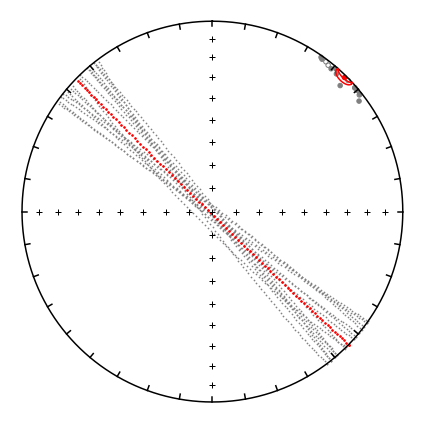

In [53]:
NWD1_strikes = NWD1_planes[' strike'].tolist()
NWD1_dips = NWD1_planes[' dip'].tolist()

NWD1_pole_trend = NWD1_planes['pole_trend'].tolist()
NWD1_pole_plunge = NWD1_planes['pole_plunge'].tolist()

NWD1_mean_strike, NWD1_mean_dip, NWD1_pole_mean = mean_strike_dip(NWD1_pole_trend, NWD1_pole_plunge)

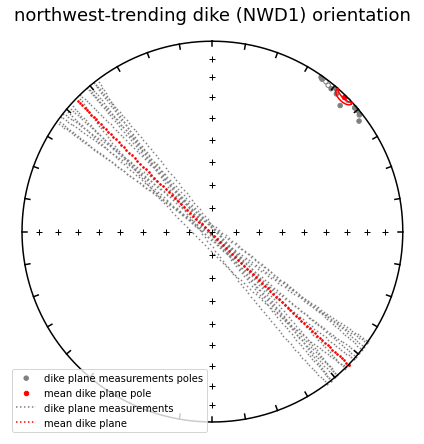

In [55]:
pole_trends = NWD1_pole_trend
pole_plunges = NWD1_pole_plunge

fignum = 1
fig = plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(pole_trends,pole_plunges,color='grey',label='dike plane measurements poles')
for n in range(0,len(pole_trends)):
    plotC(fignum,(pole_trends[n],pole_plunges[n]),90,col='grey',ms=2)

ipmag.plot_di_mean(NWD1_pole_mean['dec'],NWD1_pole_mean['inc'],NWD1_pole_mean['alpha95'],
                   color='red',label='mean dike plane pole')
plotC(fignum,(NWD1_pole_mean['dec'],NWD1_pole_mean['inc']),90,col='red',ms=10)
plt.legend()

from matplotlib.lines import Line2D
grey_line = [Line2D([0], [0], linestyle=':',color='grey')]
red_line = [Line2D([0], [0], linestyle=':', color='red')]

h, l = plt.gca().get_legend_handles_labels()
plt.gca().legend([h[1],h[2],grey_line[0],red_line[0]], [l[1],l[2],'dike plane measurements','mean dike plane'],loc=3)
plt.title('northwest-trending dike (NWD1) orientation',fontsize=18)
plt.savefig('visualizations/northwest_dike_orientation.pdf',bbox_inches='tight')
plt.show()

## NED summary and mean

In [56]:
NED_list = ['NED1','NED2','NED3','NED4','NED5',
            'NED7','NED8','NED9','NED10',
            'NED11','NED12','NED13','NED14','NED15',
            'NED17','NED18','NED19',
            'NED22','NED23','NED24',
            'NED32','NED34',
            'NED35','NED36','NED37']

NED_mean_list = [NED1_pole_mean,NED2_pole_mean,NED3_pole_mean,NED4_pole_mean,NED5_pole_mean,
                 NED7_pole_mean,NED8_pole_mean,NED9_pole_mean,NED10_pole_mean,
                 NED11_pole_mean,NED12_pole_mean,NED13_pole_mean,NED14_pole_mean,NED15_pole_mean,
                 NED17_pole_mean,NED18_pole_mean,NED19_pole_mean,
                 NED22_pole_mean,NED23_pole_mean,NED24_pole_mean,
                 NED32_pole_mean,NED34_pole_mean,
                 NED35_pole_mean,NED36_pole_mean,NED37_pole_mean]


NED_pole_means = pd.DataFrame.from_records(NED_mean_list,index=NED_list)
NED_pole_means

,dec,inc,n,r,k,alpha95,csd
NED1,344.647559,8.324209,4,3.969046,96.917940,9.379863,8.227785
NED2,344.273797,-0.108784,10,9.742140,34.902676,8.291878,13.710575
NED3,328.688825,11.448380,13,12.673425,36.745031,6.930683,13.362438
NED4,339.678440,-0.570992,7,6.927654,82.934978,6.667034,8.894390
NED5,337.377351,5.440195,7,6.906133,63.920508,7.607308,10.131294
NED7,356.797754,0.024586,10,9.373612,14.368085,13.192810,21.369068
NED8,337.482847,-3.029912,8,7.897485,68.282486,6.750894,9.802353
NED9,327.161674,3.953942,6,5.987670,405.506193,3.331290,4.022409
NED10,331.582407,-8.329706,3,2.991786,243.474228,7.917807,5.191090
NED11,319.757833,-9.102316,6,5.982925,292.827532,3.921940,4.733464


In [57]:
NED_all_mean_strike, NED_all_mean_dip, NED_all_pole_mean = mean_strike_dip(NED_pole_means.dec, NED_pole_means.inc, show_fig=False)

Dec: 337.8  Inc: 2.7
Number of directions in mean (n): 25
Angular radius of 95% confidence (a_95): 3.7
Precision parameter (k) estimate: 60.6

mean strike: 67.79840890987873
mean dip: 87.28877052079733


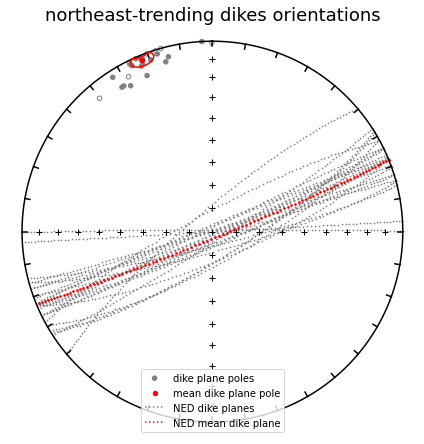

In [59]:
pole_trends = NED_pole_means.dec
pole_plunges = NED_pole_means.inc

fignum = 1
fig = plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(pole_trends,pole_plunges,color='grey',label='dike plane poles')
for n in range(0,len(pole_trends)):
    plotC(fignum,(pole_trends[n],pole_plunges[n]),90,col='grey',ms=2)

ipmag.plot_di_mean(NED_all_pole_mean['dec'],NED_all_pole_mean['inc'],NED_all_pole_mean['alpha95'],
                   color='red',label='mean dike plane pole')
plotC(fignum,(NED_all_pole_mean['dec'],NED_all_pole_mean['inc']),90,col='red',ms=10)
plt.legend()

from matplotlib.lines import Line2D
grey_line = [Line2D([0], [0], linestyle=':',color='grey')]
red_line = [Line2D([0], [0], linestyle=':', color='red')]

h, l = plt.gca().get_legend_handles_labels()
plt.gca().legend([h[1],h[2],grey_line[0],red_line[0]], [l[1],l[2],'NED dike planes','NED mean dike plane'],loc=8)
plt.title('northeast-trending dikes orientations',fontsize=18)
#plt.savefig('visualizations/northeast_dike_orientations.pdf',bbox_inches='tight')
plt.show()

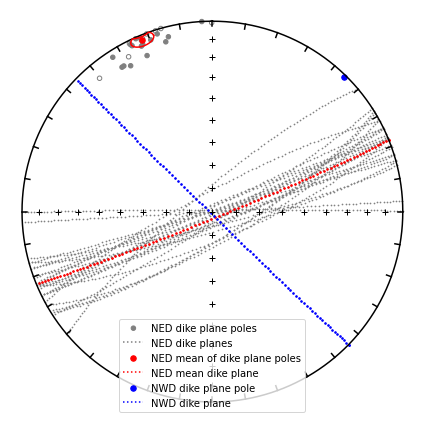

In [60]:
pole_trends = NED_pole_means.dec
pole_plunges = NED_pole_means.inc

fignum = 1
fig = plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di(pole_trends,pole_plunges,color='grey',label='NED dike plane poles')
for n in range(0,len(pole_trends)):
    plotC(fignum,(pole_trends[n],pole_plunges[n]),90,col='grey',ms=2)

ipmag.plot_di_mean(NED_all_pole_mean['dec'],NED_all_pole_mean['inc'],NED_all_pole_mean['alpha95'],
                   color='red',label='NED mean of dike plane poles',markersize=30)
plotC(fignum,(NED_all_pole_mean['dec'],NED_all_pole_mean['inc']),90,col='red',ms=10)

# ipmag.plot_di_mean(NWD1_pole_mean['dec'],NWD1_pole_mean['inc'],NWD1_pole_mean['alpha95'],
#                    color='blue',label='NWD dike plane pole')
ipmag.plot_di(NWD1_pole_mean['dec'],NWD1_pole_mean['inc'], markersize=30,
                   color='blue',label='NWD dike plane pole')
plotC(fignum,(NWD1_pole_mean['dec'],NWD1_pole_mean['inc']),90,col='blue',ms=10)

from matplotlib.lines import Line2D
grey_line = [Line2D([0], [0], linestyle=':',color='grey')]
red_line = [Line2D([0], [0], linestyle=':', color='red')]
blue_line = [Line2D([0], [0], linestyle=':', color='blue')]

h, l = plt.gca().get_legend_handles_labels()
plt.gca().legend([h[1],grey_line[0],h[2],red_line[0],h[3],blue_line[0]], [l[1],'NED dike planes',l[2],'NED mean dike plane',l[3],'NWD dike plane',],loc=8)
plt.savefig('visualizations/dike_orientations.pdf',bbox_inches='tight')
plt.show()